# Project 3
**Group 2** 
Ada Matilde Gige (adgi@itu.dk), Albert Schiffer (albsc@itu.dk), Andreas Frederik Flensted Olsen (frao@itu.dk), Timothy Beck (tibe@itu.dk) and Victor Popp Henriksen (vhen@itu.dk)


# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image 
import seaborn as sns

from os import walk #Used for getting all the filenames from a given directory !!!!!MAYBE NOT NECESSARY!!!!!
import glob #For finding specific file types

%run -i ../fyp2021p3_group00_functions.py

# Loading raw datafiles

In [3]:
#load all images of type .jpg
im_file_list2 = glob.glob("../data/example_image/*.jpg")
#load all maps of type .png
map_file_list2 = glob.glob("../data/example_segmentation/*.png")

#im_files = sorted(im_file_list2, key = uniq)
im_files = sorted(im_file_list2)
len(im_files)

#map_files = sorted(map_file_list2, key = uniq)
map_files = sorted(map_file_list2)
len(map_files)         

# Loading the true file in
true = pd.read_csv('../data/example_ground_truth.csv')
# It is already sorted why it is not sorted as the others



## Loading the images into a list and making an ID dictionary
Taken from: https://stackoverflow.com/questions/33369832/read-multiple-images-on-a-folder-in-opencv-python/33371454

In [4]:
#Load in all .jpg files from the 'example_image' folder
images = [plt.imread(file) for file in im_files]
#Load in all .png files from the 'example_segmentation' folder
maps = [plt.imread(file) for file in map_files]

# Making a dictionary to find the id from the index
pic_id = dict()

for i in range(150):
    pic_id[i] = true['image_id'][i]
    

# Changing a normal image to luminace image
Making an image as the segmentation masks

In [8]:
def tolum(image):
    '''A function that takes a pictures filename, the picture must be two colored'''
    image = Image.open(image).convert('L')
    imagenp = np.asarray(image)
    return image , imagenp
    

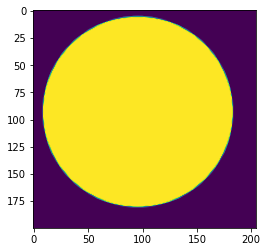

In [12]:
image , imagenp = tolum('circle.png')

plt.imshow(imagenp)

# Features

## Asymmetry

In [5]:
#A function that finds the center of a picture and meassures the assymmetri

def assymmetry(mapID):
    mask = maps[mapID]
    
    borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
    up, down, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
    center = ((left + right)//2, (up+down) //2) # Tuple with the coordinates for the center of the lesion
    
    difference = 0
    
    for i in range(18):
        borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
        left, right = min(borders[1]), max(borders[1])
        
        
        radiusdiff = (center[0]-left) - (right-center[0])
        difference += radiusdiff**2
        mask = transform.rotate(mask, 10, center = center)
    return difference/areas[mapID]
        

In [14]:
asymmetry = pd.read_csv("../data/features/assymmetry.csv", names = ['asymmetry'])

In [15]:
asymmetry

,asymmetry
0,0.082240
1,0.096948
2,0.007147
3,0.018892
4,0.154463
...,...
145,0.039940
146,0.682602
147,0.034185
148,0.006164


## Border
### Area and perimiter

In [ ]:
# Finding the area and perimeter of all images. 

areas = []
peris = []
for i in maps:
    area, perimiter = measure_area_perimeter(i)
    areas.append(areas)
    peris.append(perimiter)
    
# Adding them to a file, so they don't have to be calculated each time

#np.savetxt("../data/features/perimeter.csv", peris, delimiter=",")
#np.savetxt("../data/features/area.csv", areas, delimiter=",")

In [6]:
areas = np.genfromtxt('../data/features/areas.csv', delimiter=',')
perimeter = np.genfromtxt('../data/features/perimeter.csv', delimiter=',')

### Area and perimeter scatterplot

In [27]:
def scatterplot(area, perimeter):
    # Define the size of the figure
    fig = plt.figure(figsize=(4, 3))
    # Set axes, that you want to work with:
    axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
    # actually plot the data:
    axes.scatter(area, perimeter, label = 'Data', edgecolors='white')
    axes.set_title('Area and perimeter')
    axes.set_xlabel('Area')
    axes.set_ylabel('Perimeter')
    #axes.legend(loc='upper left'); axes.set_xlabel(data); axes.set_ylabel(data); axes.set_title('Scatter plot');
    return None

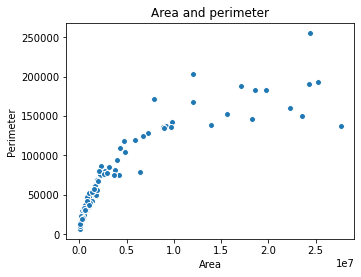

In [28]:
scatterplot(areas, perimeter)

## Perimeter divided by area

In [32]:
#making the perimiter divided by area feature

pa = []
for i in range(150): 
    pa.append(perimeter[i]/areas[i])
    
# Making a file with the perimeter divided by area feature
#np.savetxt("../data/features/perimeterdivarea.csv", areas, delimiter=",")


In [33]:
pa = np.genfromtxt('../data/features/perimeterdivarea.csv', delimiter=',')

### Making a histogram for the perimeter/area

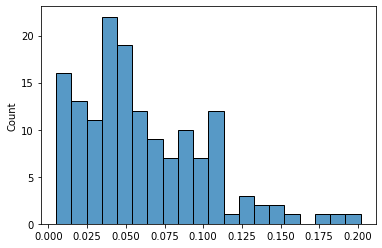

In [35]:
sns.histplot(pa, bins = 20)

# All features in one dataframe

In [19]:
true['unhealthy'] = 0

for i in range(150):
    if true['melanoma'][i] == 1 or true['seborrheic_keratosis'][i] == 1:
        true['unhealthy'][i] = 1

areas = pd.read_csv("../data/features/areas.csv", names = ['area'])
perimeter = pd.read_csv("../data/features/perimeter.csv", names = ['perimeter'])
pa = pd.read_csv('../data/features/perimeterdivarea.csv', names = ['peri/area'])
asymmetry = pd.read_csv("../data/features/assymmetry.csv", names = ['asymmetry'])

true['assymmetry'] = asymmetry
true['area'] = areas
true['perimeter'] = perimeter
true['peri/area'] = pa

allfeatures = true
        
allfeatures

<ipython-input-19-eebf5ef4f6d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['unhealthy'][i] = 1


,image_id,melanoma,seborrheic_keratosis,unhealthy,assymmetry,area,perimeter,peri/area
0,ISIC_0001769,0,0,0,0.082240,216160.0,20601.0,0.095304
1,ISIC_0001852,0,0,0,0.096948,130493.0,14625.0,0.112075
2,ISIC_0001871,0,0,0,0.007147,205116.0,18368.0,0.089549
3,ISIC_0003462,0,0,0,0.018892,161705.0,14381.0,0.088934
4,ISIC_0003539,0,0,0,0.154463,317040.0,21762.0,0.068641
...,...,...,...,...,...,...,...,...
145,ISIC_0015443,0,0,0,0.039940,9732988.0,135731.0,0.013945
146,ISIC_0015445,0,0,0,0.682602,12049938.0,202926.0,0.016840
147,ISIC_0015483,0,0,0,0.034185,8856478.0,136170.0,0.015375
148,ISIC_0015496,0,0,0,0.006164,8951522.0,135296.0,0.015114
